In [245]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import svm
from lib import *
from svm import *
from QPslover import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [333]:
data, lable  = load_train("./data/0vs8Source.csv")
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape
print "validation data: ", validation_data.shape
print "validation lable: ", validation_lable.shape

train data:  (432L, 16L)
train lable:  (432L,)
validation data:  (49L, 16L)
validation lable:  (49L,)


In [334]:
train_data, train_lable =  load_train("./data/0vs8Source.csv")
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape

train data:  (481L, 16L)
train lable:  (481L,)


In [259]:
target_data, target_lable  = load_train("./data/0vs8Target.csv")
target_data, target_lable, target_v_data, target_v_lable = shuffleData(target_data, target_lable)
print "train data: ", target_data.shape
print "train lable: ", target_lable.shape
print "validation data: ", target_v_data.shape
print "validation lable: ", target_v_lable.shape

train data:  (36L, 16L)
train lable:  (36L,)
validation data:  (3L, 16L)
validation lable:  (3L,)


In [335]:
target_data, target_lable  = load_train("./data/0vs8Target.csv")
print "train data: ", target_data.shape
print "train lable: ", target_lable.shape


train data:  (39L, 16L)
train lable:  (39L,)


In [336]:
# it is 0 vs 8 problem, so divde only two class
train_lable[train_lable <= 4 ] = -1
train_lable[train_lable > 4] = 1
validation_lable[validation_lable <= 4 ] = -1
validation_lable[validation_lable > 4] = 1

In [337]:
target_lable[target_lable <= 4 ] = -1
target_lable[target_lable > 4] = 1
target_v_lable[target_v_lable <= 4 ] = -1
target_v_lable[target_v_lable > 4] = 1

In [338]:
w, b = QP_Slover(train_data, train_lable)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.146481661648
            Iterations: 10
            Function evaluations: 193
            Gradient evaluations: 10


In [339]:
pre_vali = prediction_QP(w, b, target_data)
correct_rate_only(pre_vali, target_lable)

0.8974358974358975

In [430]:
w_target, b_target = QP_Slover_transfer(target_data, target_lable, w, 70)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 69.9801062759
            Iterations: 101
            Function evaluations: 2097
            Gradient evaluations: 100


In [431]:
pre_vali = prediction_QP(w_target, b_target, target_data)
correct_rate_only(pre_vali, target_lable)

1.0

In [432]:
test_data  = load_test("./data/0vs8TestNoLabels.csv")
print "train data: ", test_data.shape



(200L, 16L)
train data:  (200L, 16L)


In [433]:
pre_test = prediction_QP(w_target, b_target, test_data)
test_lable = np.zeros(200)
test_lable[:100] = 1
test_lable[100:] = -1

In [434]:
correct_rate_only(pre_test, test_lable)



0.68

Iteration limit exceeded    (Exit mode 9)
            Current function value: 69.9575008418
            Iterations: 101
            Function evaluations: 2110
            Gradient evaluations: 101
Iteration limit exceeded    (Exit mode 9)
            Current function value: 70.0125817207
            Iterations: 101
            Function evaluations: 2187
            Gradient evaluations: 101
Iteration limit exceeded    (Exit mode 9)
            Current function value: 70.0495278261
            Iterations: 101
            Function evaluations: 2192
            Gradient evaluations: 101
Iteration limit exceeded    (Exit mode 9)
            Current function value: 70.0293494476
            Iterations: 101
            Function evaluations: 2088
            Gradient evaluations: 100
Iteration limit exceeded    (Exit mode 9)
            Current function value: 70.0191610857
            Iterations: 101
            Function evaluations: 2117
            Gradient evaluations: 100
Optimization te

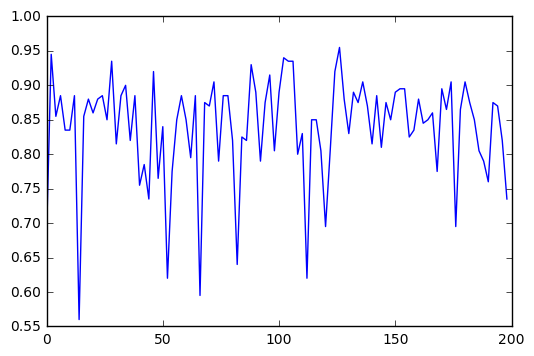

In [436]:
trace_k =[]
trace_rate =[]
best = 0
best_k = 0
for i in range(100):
    k = 2*i
    w_target, b_target = QP_Slover_transfer(target_data, target_lable, w, 70)
    pre_test = prediction_QP(w_target, b_target, test_data)
    rate = correct_rate_only(pre_test, test_lable)
    trace_rate.append(rate)
    trace_k.append(k)
    if best < rate:
        best = rate
        best_k = k
plt.plot(trace_k, trace_rate)    
print "best rate = %r, best k = %i" %(best, best_k)